In [1]:
%matplotlib inline
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Lib.BEM_Solver.BEM_2D import *
from Lib.Domain_Decomposition.Coupling_Main import *

In [17]:
def NeumannBC_func(Pts):
    #https://www.chegg.com/homework-help/questions-and-answers/2-solve-2d-steady-state-heat-conduction-equation-0-square-region-0-sx-s-1-0-sy-conditions--q24440992
    x,y=Pts[0],Pts[1]
    return 60*np.cos(4*np.pi*x)
def ExactSol(Pts):
    x,y=Pts[0],Pts[1]
    
    P=15*np.cos(4*np.pi*x)*np.sinh(4*np.pi*y)/(np.pi*np.cosh(4*np.pi))
    U=15*np.sin(4*np.pi*x)*np.sinh(4*np.pi*y)/(np.pi*np.cosh(4*np.pi))*4*np.pi
    V=-15*np.cos(4*np.pi*x)*np.cosh(4*np.pi*y)/(np.pi*np.cosh(4*np.pi))*4*np.pi
    return P,U,V


[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:40 E-T(40,0)
[Mesh] Number of Nodes:40 E-T(40-0)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 0)]
[Boundary Condition] BCs set up
[Boundary Condition] Neumann BC @ [(2, <function NeumannBC_func at 0x000000001C146840>)]


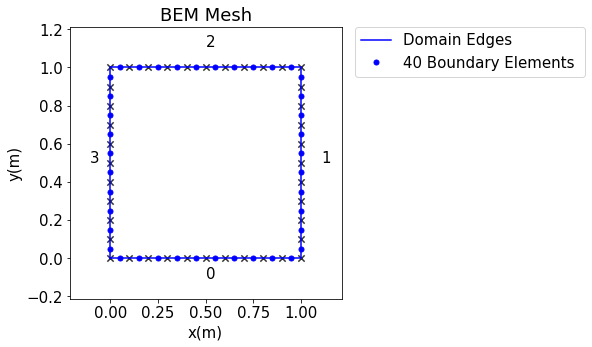

In [57]:
BEM_Case1=BEM2D()

#1.Build Mesh-#Anti-clock wise for internal domain
Boundary_vert=[(0.0, 0.0), (1.0, 0.0),(1.0,1.0),(0.0,1.0)]  #bottom
element_esize=0.1

BEM_Case1.set_Mesh(Boundary_vert,[],element_esize,[],Type="Const")

#2.Set Boundary condition
bc0=[(0,0)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)#,RobinBC=bc1)
bc_func=[(2,NeumannBC_func)]
BEM_Case1.set_BoundaryCondition(NeumannBC=bc_func,mode='func',update=1)#,RobinBC=bc1)

#bc0=[(3,100)]
#bc1=[(1,-50)]
#BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)#,RobinBC=bc1)

#3.Set Domain Properties - permeability tensor
k11=1
k12=2
k22=5
k_tensor=[k11,k12,k22]
BEM_Case1.SetProps(k_tensor)

#Check Mesh
BEM_Case1.plot_Mesh()
#Check Node,BC if necessary
#BEM_Case1.Mesh.print_debug()

[Visulization] Plotting Solution


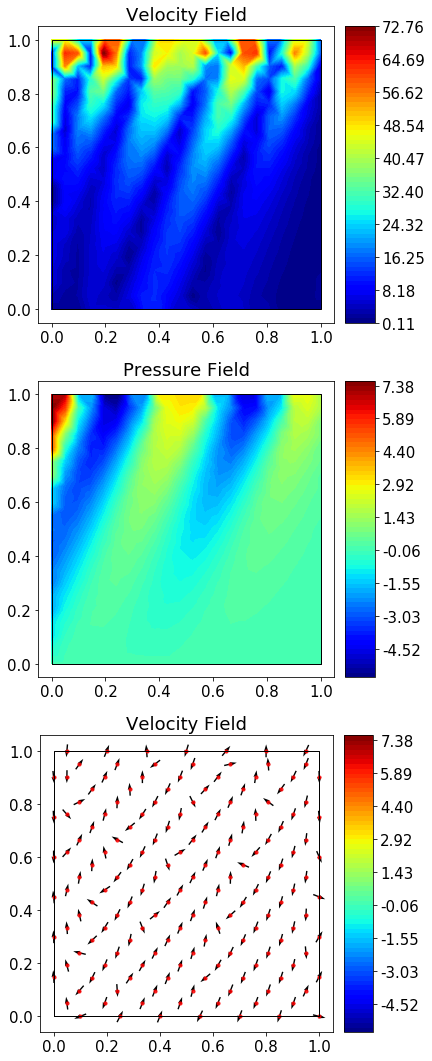

In [58]:
puv=BEM_Case1.Solve()
xx=BEM_Case1.PostProcess.plot_Solution()
#BEM_Case1.PostProcess.print_Solution()

In [92]:
BEM_Case1.get_Solution((0.01,0.98))

(51.467197395790656, -147.27050608907115, -3.993965344213798)

In [91]:
np.array(Field_Solve(0.01,0.98,BEM_Case1.BEs_edge,BEM_Case1.Mesh))

array([  51.4671974 , -147.27050609,   -3.99396534])

## Solution Verification

In [39]:
Pts1,Pts2=(0.0,0.98),(1.0,0.98)

#Exact Solution
X0,PUV_exact=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,func=ExactSol,plot=False)
#BEM Solution
X0,PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SquareDomain2_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SquareDomain2_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SquareDomain2_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['Exact','BEM-DOF:60','FEM-DOF:12765']
DataSetX=[X0,X0,P[:,0]]

DataSetY=[PUV_exact[:,0],PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV_exact[:,1],PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetY=[PUV_exact[:,2],PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

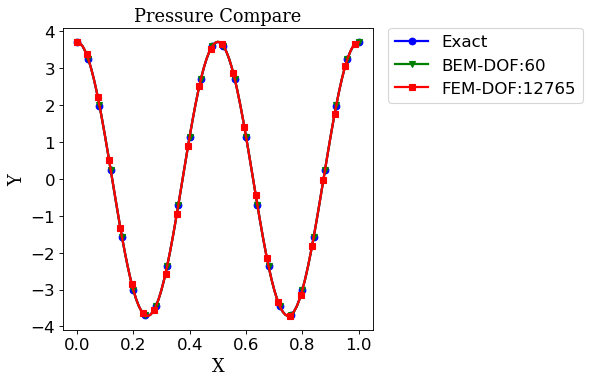

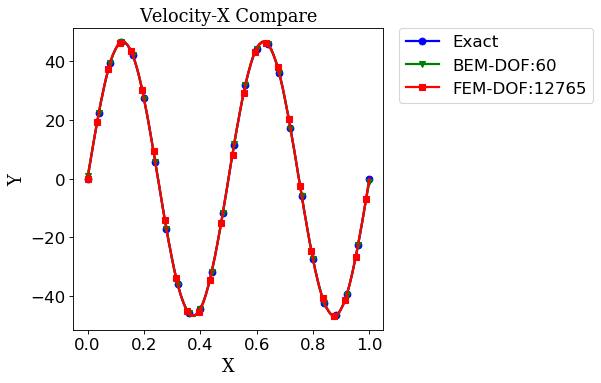

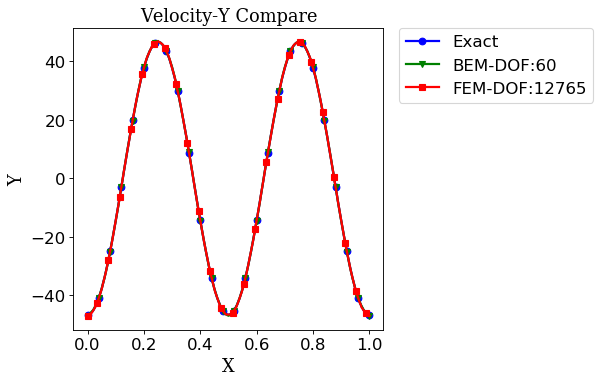

In [41]:
#Exact Solution
X0,PUV_exact=BEM_Case1.PostProcess.plot_SolutionBD(func=ExactSol,plot=False)
#BEM Solution
X1,PUV=BEM_Case1.PostProcess.plot_SolutionBD(plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SquareDomain2_BD_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SquareDomain2_BD_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SquareDomain2_BD_v.csv', comments='%',delimiter=',')

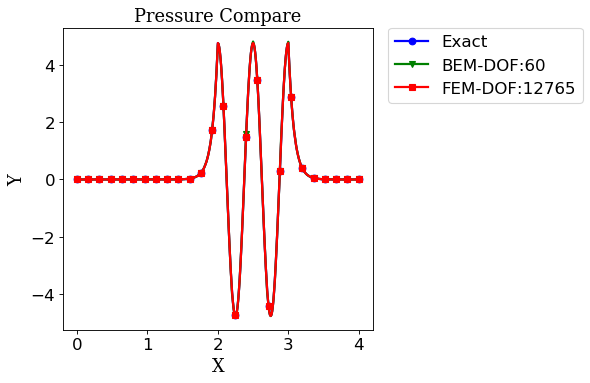

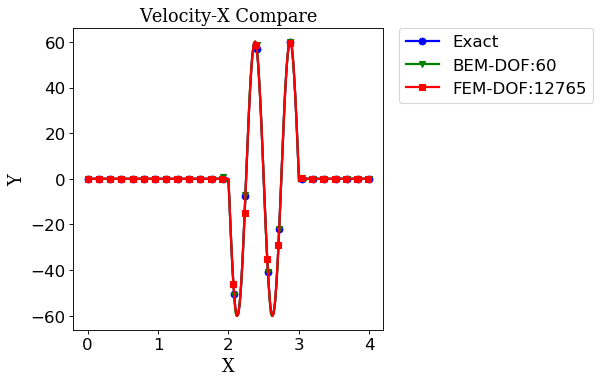

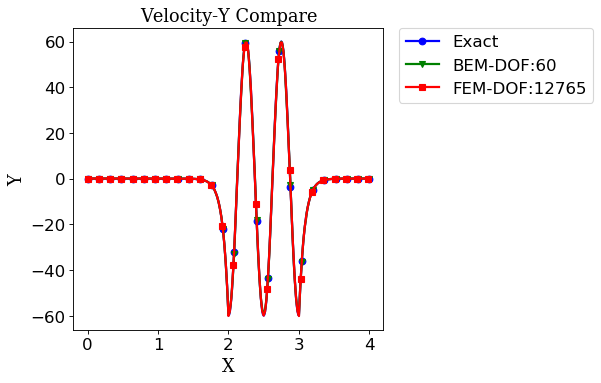

In [42]:
#Compare Pressure
DataNames=['Exact','BEM-DOF:60','FEM-DOF:12765']

DataSetX=[X0,X1,P[:,0]]
DataSetY=[PUV_exact[:,0],PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetX=[X0,X1,U[:,0]]
DataSetY=[PUV_exact[:,1],PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetX=[X0,X1,V[:,0]]
DataSetY=[PUV_exact[:,2],PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

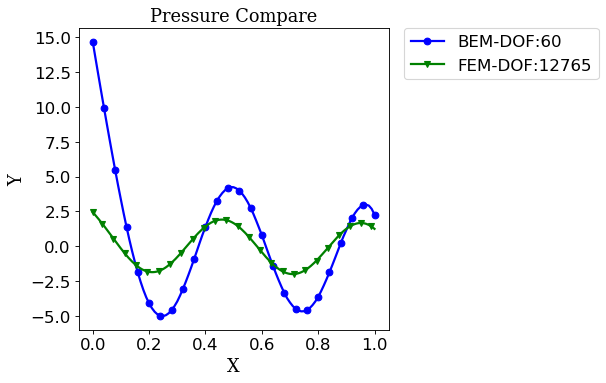

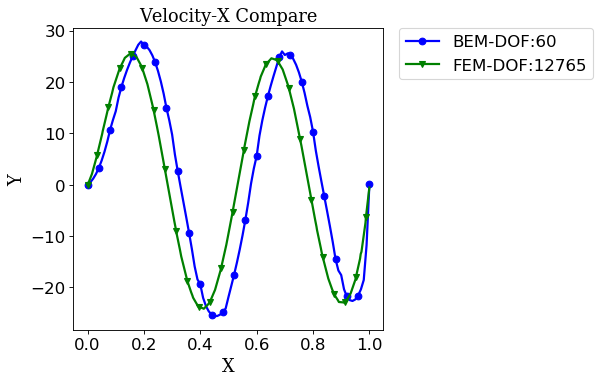

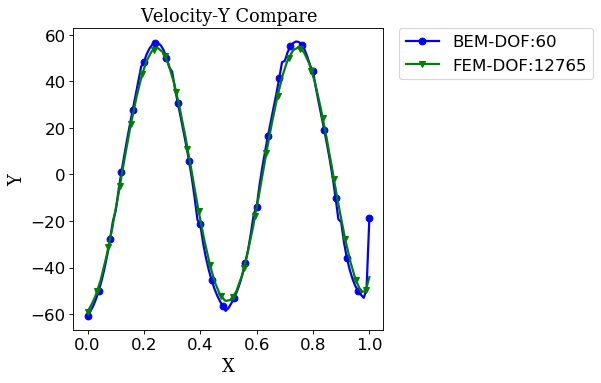

In [51]:
Pts1,Pts2=(0.0,0.98),(1.0,0.98)

#BEM Solution
X0,PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SquareDomain2_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SquareDomain2_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SquareDomain2_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']
DataSetX=[X0,P[:,0]]

DataSetY=[PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetY=[PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

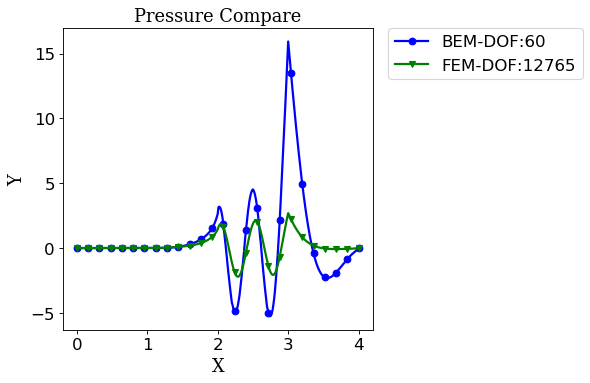

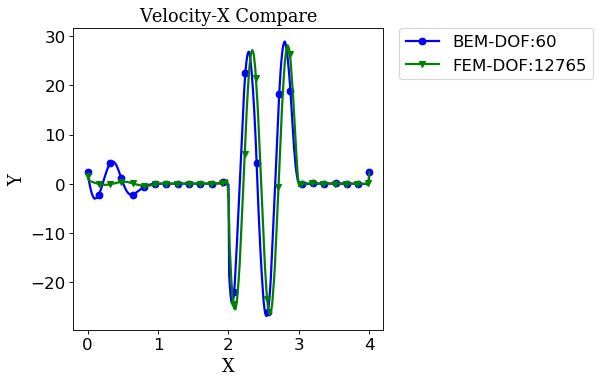

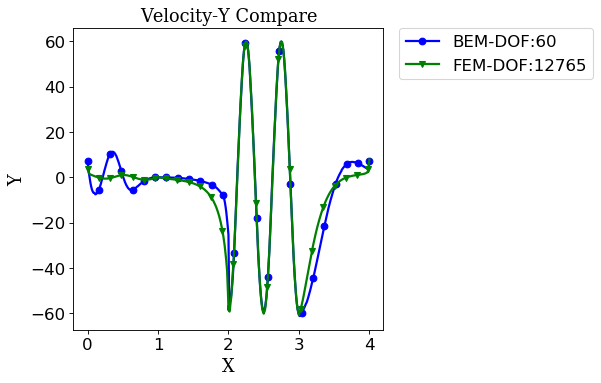

In [52]:
#BEM Solution
X1,PUV=BEM_Case1.PostProcess.plot_SolutionBD(plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SquareDomain2_BD_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SquareDomain2_BD_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SquareDomain2_BD_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']

DataSetX=[X1,P[:,0]]
DataSetY=[PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetX=[X1,U[:,0]]
DataSetY=[PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetX=[X1,V[:,0]]
DataSetY=[PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')